In [44]:
from tensorflow import keras
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Definicao do modelo

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Reshape(target_shape=[28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    # keras.layers.Dense(560, activation="relu"),
    keras.layers.Dense(280, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Treinando o modelo

In [46]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3820 - accuracy: 0.8637 - val_loss: 0.2979 - val_accuracy: 0.8936
Epoch 2/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2546 - accuracy: 0.9074 - val_loss: 0.2615 - val_accuracy: 0.9060
Epoch 3/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2087 - accuracy: 0.9221 - val_loss: 0.2399 - val_accuracy: 0.9154
Epoch 4/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1723 - accuracy: 0.9368 - val_loss: 0.2449 - val_accuracy: 0.9130
Epoch 5/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1433 - accuracy: 0.9463 - val_loss: 0.2461 - val_accuracy: 0.9162
Epoch 6/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1170 - accuracy: 0.9567 - val_loss: 0.2476 - val_accuracy: 0.9174
Epoch 7/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.0966 - accuracy: 0.9642 - val_loss: 0.2677 - val_ac

Avaliando o modelo

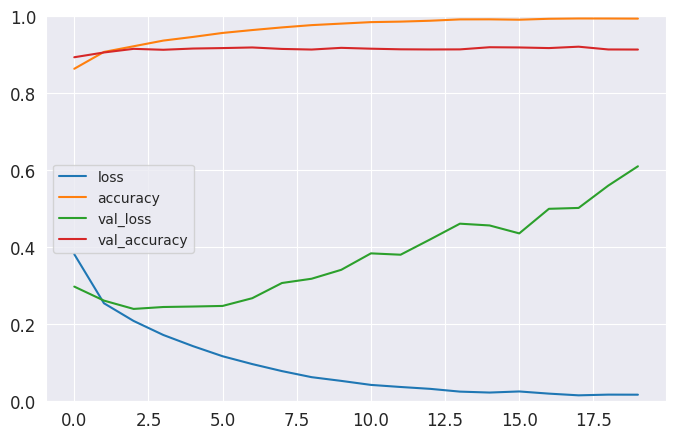

In [47]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [48]:
# model.evaluate(X_test, y_test)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 90.310
